In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager
from pathlib import Path

#formats for currency 
import locale 



In [1]:
LightOrange='#FCAA17'
DarkGreen='#FCAA17'
Red = '#EF404E'
DarkPurple = '#552564'
Blue='#0055AA'
DarkNavy='#130F54'
DarkSlate='#3C3532'
DarkBurgundy='#691B40'
OffBlack='#231F20'
LightSlate='#EFECEA'
LightYellow='#FFE06A'
LightGreen='#FFE06A'
LightPink='#FABEAF'
LightAzure='#A3DBE3'
Gray20='#CCCCCC'

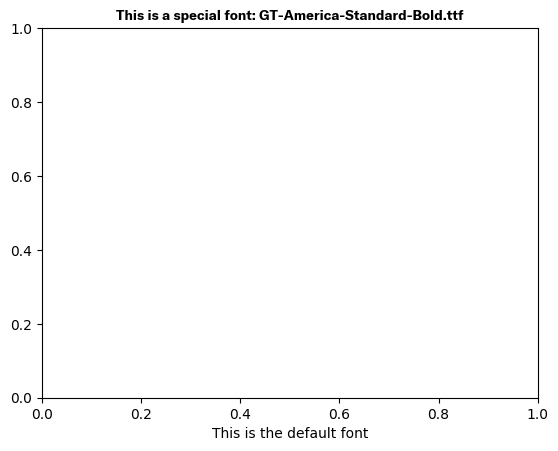

In [3]:
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fpath = Path(mpl.get_data_path(), "fonts/ttf/GT-America-Standard-Bold.ttf")
ax.set_title(f'This is a special font: {fpath.name}', font=fpath)
ax.set_xlabel('This is the default font')

plt.show() 

In [4]:
status_bpd = pd.DataFrame(pd.read_csv('./Data/csv/BPD_SWORN_JOBUPDATE_from_7-1-2017_to_current_date.csv', encoding='latin1'))
earnings21 = pd.DataFrame(pd.read_csv('./Data/employees-2021.csv', encoding='latin1'))
bpd_earnings21 = earnings21[earnings21['DEPARTMENT_NAME']=='Boston Police Department']
#print(bpd_earnings21.index)

#print(len(status_bpd.index))
#print((bpd_earnings21),(status_bpd))
#print(len(bpd_earnings21[bpd_earnings21['TITLE']=='Police Officer'].index))
#print(len(bpd_earnings21[bpd_earnings21['TITLE']=='Police Officer'].index))
officer_df = bpd_earnings21[bpd_earnings21['TITLE']=='Police Officer']
officer_df['Name']=officer_df['NAME']
officer_df = (officer_df.merge(status_bpd[['Name','Current HR Status']]))
#officer_df = officer_df[officer_df['Current HR Status']]

C:\Users\hroth\AppData\Local\Temp\ipykernel_24052\2806197774.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officer_df['Name']=officer_df['NAME']



Number of police officers active, medical leave, etc.  <br />
    -Graph of number of active vs not active officers  <br />
	-Graph of number of officers being paid injury pay vs not   <br />
	-Graph of number of officers being paid detail pay vs not  <br />
	-Graph of number of officers being paid ot pay vs not   <br />
	-Graph of number of officers being paid retro pay vs not  <br />
	-Graph of number of officers being paid quinn pay vs not  <br />
	-Graph of number of officers being paid other pay vs not <br />
	-Graph of number of officers being paid total per each category below <br />
	-Pie chart of Total BPD payroll broken down in Injury, Base /  <br />
	Regular, OT, Detail, Quinn, Other, Retro <br />

	-Graph of number of active vs not active officers  


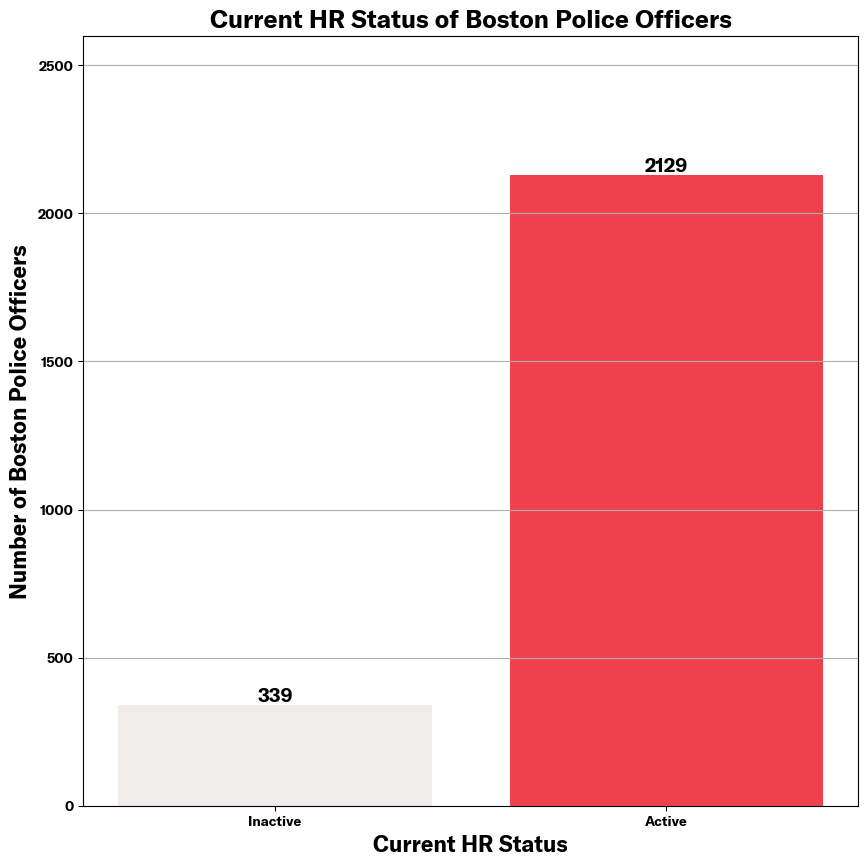

In [7]:

active_bpd = status_bpd[status_bpd['Current HR Status']=='Active'] 
inactive_bpd = status_bpd[status_bpd['Current HR Status']=='Inactive'] 

colors = ["#FCAA17", "#FCAA17", "#EF404E",'#552564','#0055AA',
    '#130F54','#3C3532','#691B40','#231F20','#EFECEA',
    '#FFE06A','#FFE06A','#FABEAF','#A3DBE3','#CCCCCC' ]
    

# make data
x = ['Inactive', 'Active']
y = [len(inactive_bpd),len(active_bpd)]

# plot
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)


cont = ax.bar(x,y, color=["#EFECEA","#EF404E"])
ax.set(ylim=(0, 2600),yticks=range(0,2600,500))
plt.xlabel(f'Current HR Status',font=fpath, fontsize=16)
plt.ylabel(f'Number of Boston Police Officers',font=fpath, fontsize=16)
plt.title(f'Current HR Status of Boston Police Officers',font=fpath,fontsize=18)
plt.grid(axis='y')

ax.bar_label(container=cont, labels=y,fontsize=14,font=fpath)

plt.xticks(font=fpath)
plt.yticks(font=fpath)

plt.show()

    -Graph of number of officers being paid injury pay vs not 

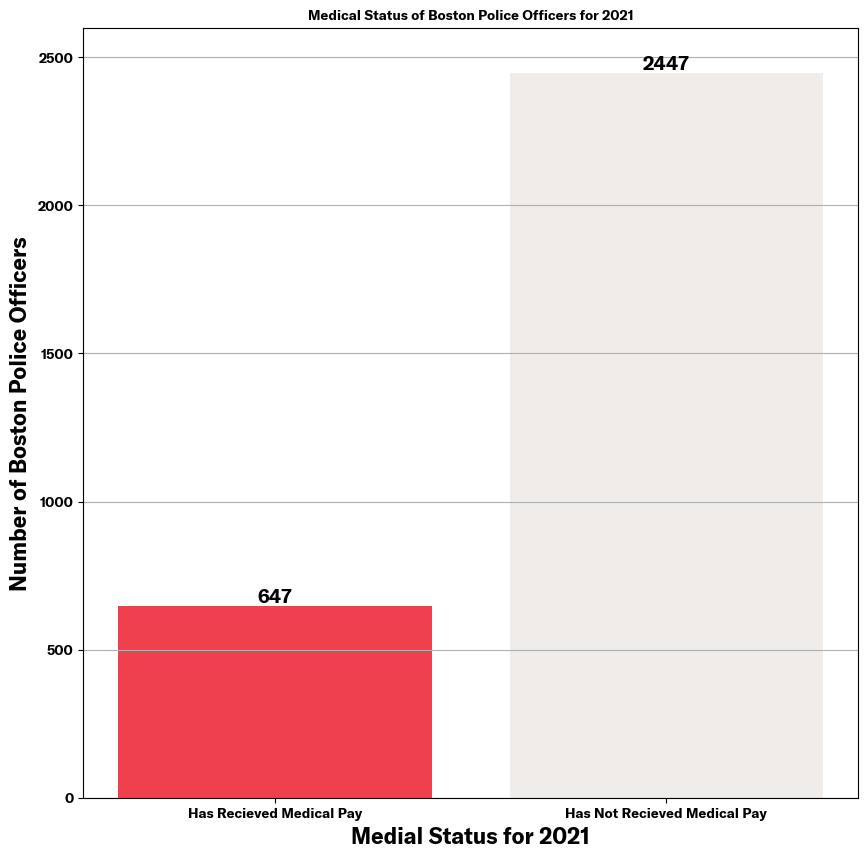

In [9]:

injured_bpd = bpd_earnings21['INJURED'].dropna() 
healthy_bpd_count = len(bpd_earnings21.index) - len(injured_bpd.index)

colors = ["#FCAA17", "#FCAA17", "#EF404E",'#552564','#0055AA',
    '#130F54','#3C3532','#691B40','#231F20','#EFECEA',
    '#FFE06A','#FFE06A','#FABEAF','#A3DBE3','#CCCCCC' ]
font = fpath


# make data
x = [ 'Has Recieved Medical Pay','Has Not Recieved Medical Pay']
y = [len(injured_bpd),healthy_bpd_count]

# plot
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)


cont = ax.bar(x,y, color=["#EF404E","#EFECEA"])
ax.set(ylim=(0, 2600),yticks=range(0,2600,500))
plt.xlabel('Medial Status for 2021', fontsize=16, font=font)
plt.ylabel('Number of Boston Police Officers', fontsize=16, font=font)
plt.title('Medical Status of Boston Police Officers for 2021',fontsize=18, font=font)
plt.grid(axis='y')


ax.bar_label(container=cont, labels=y,fontsize=14,font=font)

plt.xticks(font=fpath)
plt.yticks(font=fpath)

plt.show()

    -Graph of number of officers being paid detail pay vs not 

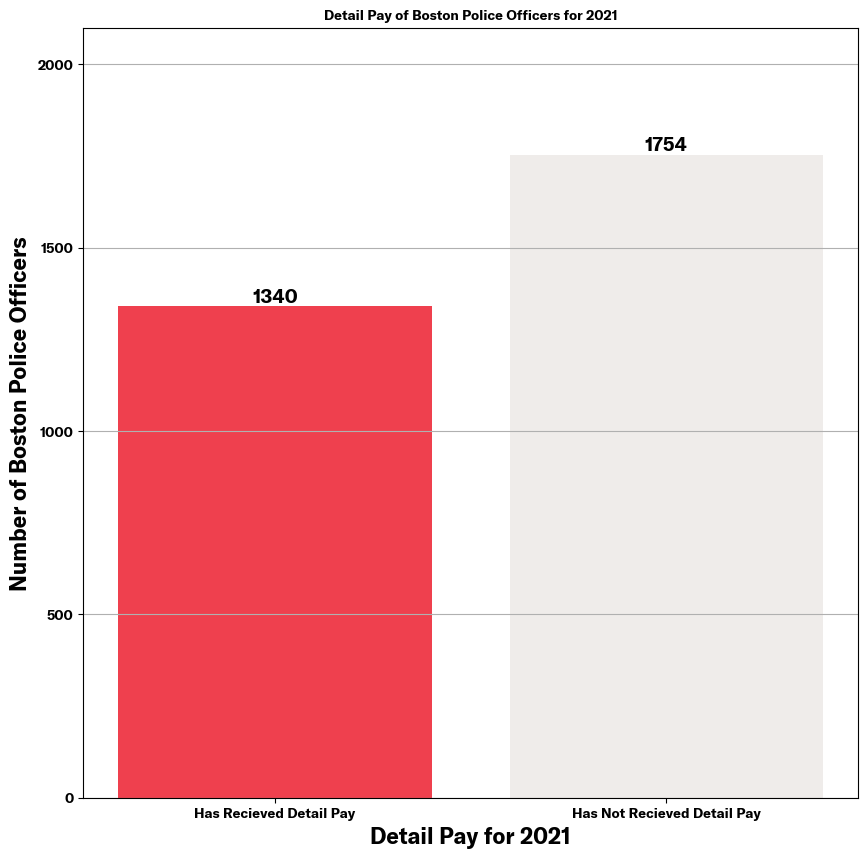

In [10]:

detail_bpd = bpd_earnings21['DETAIL'].dropna() 
nondetail_bpd_count = len(bpd_earnings21.index) - len(detail_bpd.index)

colors = ["#FCAA17", "#FCAA17", "#EF404E",'#552564','#0055AA',
    '#130F54','#3C3532','#691B40','#231F20','#EFECEA',
    '#FFE06A','#FFE06A','#FABEAF','#A3DBE3','#CCCCCC' ]
font = fpath


# make data
x = [ 'Has Recieved Detail Pay','Has Not Recieved Detail Pay']
y = [len(detail_bpd),nondetail_bpd_count]

# plot
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)


cont = ax.bar(x,y, color=["#EF404E","#EFECEA"])
ax.set(ylim=(0, 2100),yticks=range(0,2100,500))
plt.xlabel('Detail Pay for 2021', fontsize=16, font=font)
plt.ylabel('Number of Boston Police Officers', fontsize=16, font=font)
plt.title('Detail Pay of Boston Police Officers for 2021',fontsize=18, font=font)
plt.grid(axis='y')


ax.bar_label(container=cont, labels=y,fontsize=14,font=font)

plt.xticks(font=fpath)
plt.yticks(font=fpath)


plt.show()

    -Graph of number of officers being paid ot pay vs not  

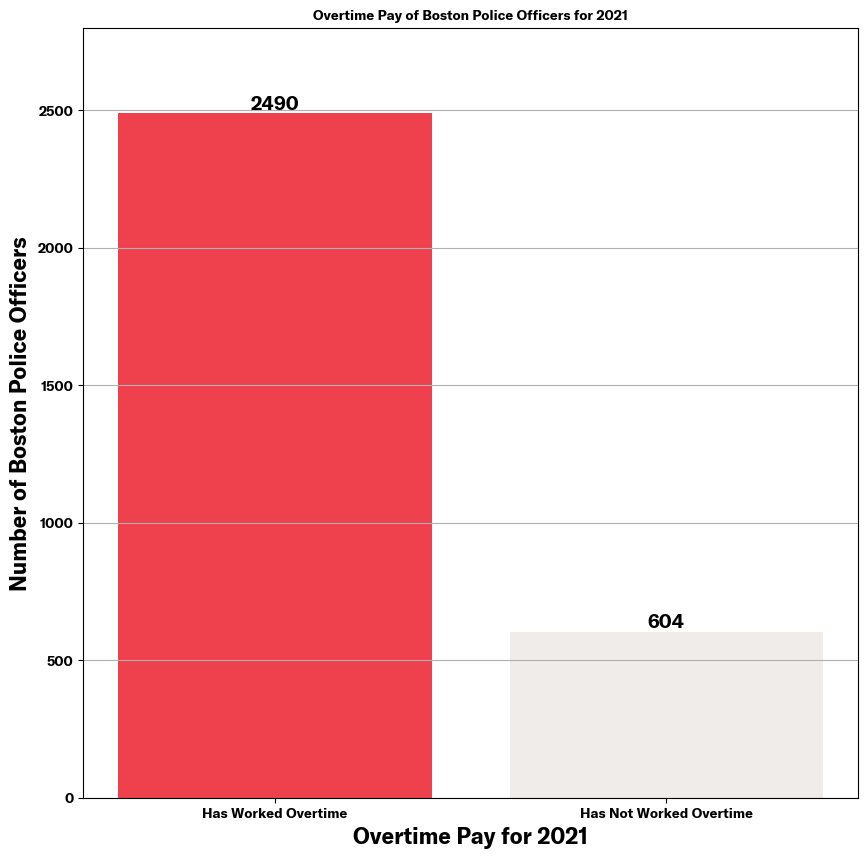

In [11]:

ot_bpd = bpd_earnings21['OVERTIME'].dropna() 
not_bpd_count = len(bpd_earnings21.index) - len(ot_bpd.index)

colors = ["#FCAA17", "#FCAA17", "#EF404E",'#552564','#0055AA',
    '#130F54','#3C3532','#691B40','#231F20','#EFECEA',
    '#FFE06A','#FFE06A','#FABEAF','#A3DBE3','#CCCCCC' ]
font = fpath


# make data
x = [ 'Has Worked Overtime','Has Not Worked Overtime']
y = [len(ot_bpd),not_bpd_count]

# plot
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)


cont = ax.bar(x,y, color=["#EF404E","#EFECEA"])
ax.set(ylim=(0, 2800),yticks=range(0,2800,500))
plt.xlabel('Overtime Pay for 2021', fontsize=16, font=font)
plt.ylabel('Number of Boston Police Officers', fontsize=16, font=font)
plt.title('Overtime Pay of Boston Police Officers for 2021',fontsize=18, font=font)
plt.grid(axis='y')


ax.bar_label(container=cont, labels=y,fontsize=14,font=font)
plt.xticks(font=fpath)
plt.yticks(font=fpath)

plt.show()

    -Graph of number of officers being paid retro pay vs not 

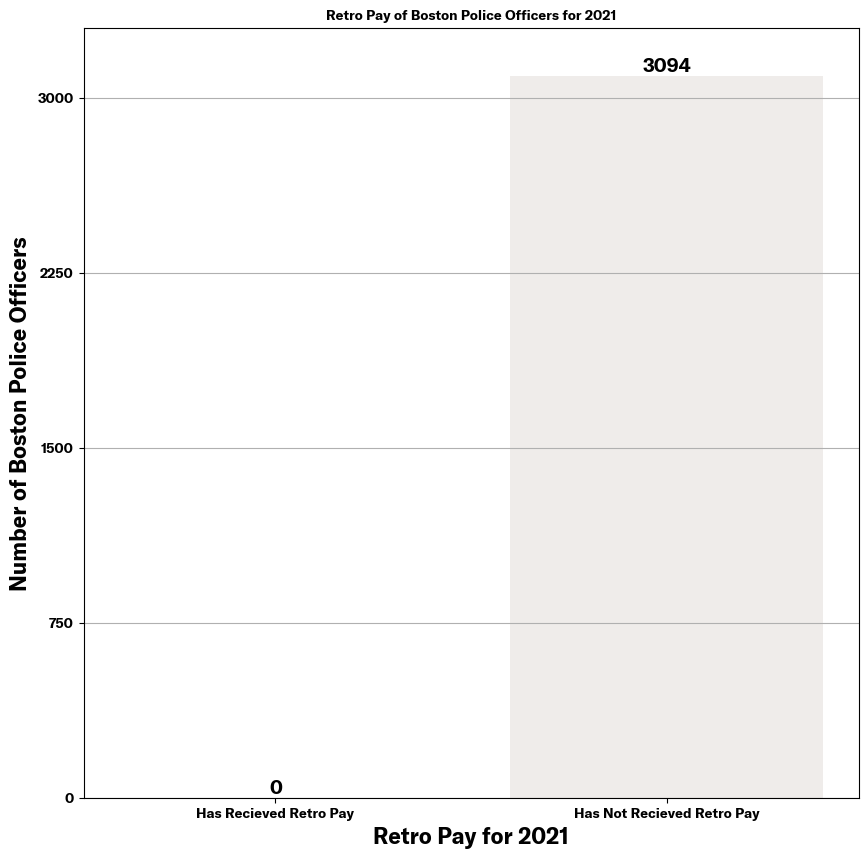

In [12]:

retro_bpd = bpd_earnings21['RETRO'].dropna() 
nonretro_bpd_count = len(bpd_earnings21.index) - len(retro_bpd.index)

colors = ["#FCAA17", "#FCAA17", "#EF404E",'#552564','#0055AA',
    '#130F54','#3C3532','#691B40','#231F20','#EFECEA',
    '#FFE06A','#FFE06A','#FABEAF','#A3DBE3','#CCCCCC' ]
font = fpath


# make data
x = [ 'Has Recieved Retro Pay','Has Not Recieved Retro Pay']
y = [len(retro_bpd),nonretro_bpd_count]

# plot
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)


cont = ax.bar(x,y, color=["#EF404E","#EFECEA"])
ax.set(ylim=(0, 3300),yticks=range(0,3300,750))
plt.xlabel('Retro Pay for 2021', fontsize=16, font=font)
plt.ylabel('Number of Boston Police Officers', fontsize=16, font=font)
plt.title('Retro Pay of Boston Police Officers for 2021',fontsize=18, font=font)
plt.grid(axis='y')


ax.bar_label(container=cont, labels=y,fontsize=14,font=font)

plt.xticks(font=fpath)
plt.yticks(font=fpath)


plt.show()

	-Graph of number of officers being paid quinn pay vs not 

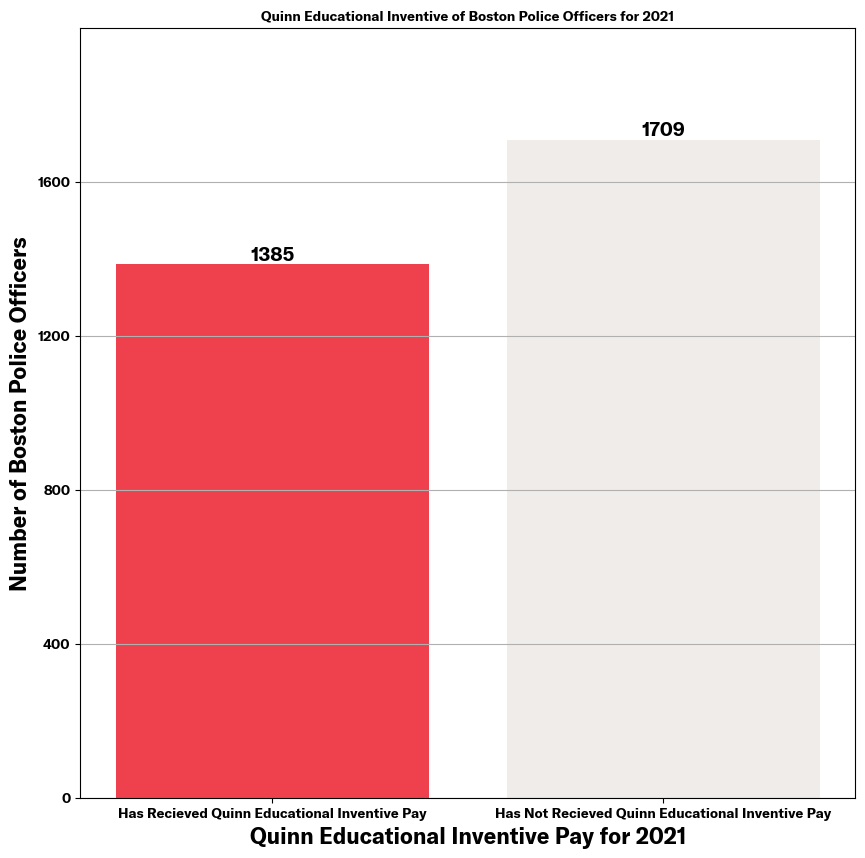

In [14]:

quinn_bpd = bpd_earnings21['QUINN_EDUCATION_INCENTIVE'].dropna() 
nonquinn_bpd_count = len(bpd_earnings21.index) - len(quinn_bpd.index)

colors = ["#FCAA17", "#FCAA17", "#EF404E",'#552564','#0055AA',
    '#130F54','#3C3532','#691B40','#231F20','#EFECEA',
    '#FFE06A','#FFE06A','#FABEAF','#A3DBE3','#CCCCCC' ]
font = fpath


# make data
x = [ 'Has Recieved Quinn Educational Inventive Pay',
     'Has Not Recieved Quinn Educational Inventive Pay']
y = [len(quinn_bpd),nonquinn_bpd_count]

# plot
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)


cont = ax.bar(x,y, color=["#EF404E","#EFECEA"])
ax.set(ylim=(0, 2000),yticks=range(0,2000,400))
plt.xlabel('Quinn Educational Inventive Pay for 2021', fontsize=16, font=font)
plt.ylabel('Number of Boston Police Officers', fontsize=16, font=font)
plt.title('Quinn Educational Inventive of Boston Police Officers for 2021',fontsize=28, font=font)
plt.grid(axis='y')


ax.bar_label(container=cont, labels=y,fontsize=14,font=font)

plt.xticks(font=fpath)
plt.yticks(font=fpath)


plt.show()

	-Graph of number of officers being paid other pay vs not

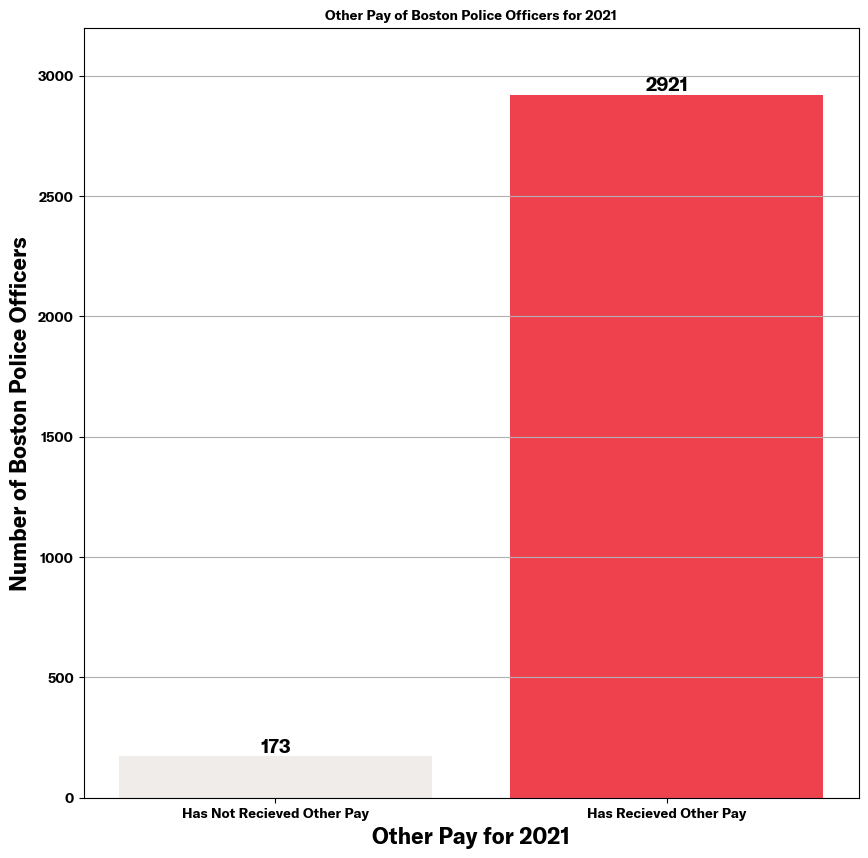

In [16]:

other_bpd = bpd_earnings21['OTHER'].dropna() 
nonother_bpd_count = len(bpd_earnings21.index) - len(other_bpd.index)

colors = ["#FCAA17", "#FCAA17", "#EF404E",'#552564','#0055AA',
    '#130F54','#3C3532','#691B40','#231F20','#EFECEA',
    '#FFE06A','#FFE06A','#FABEAF','#A3DBE3','#CCCCCC' ]
font = fpath


# make data
x = [ 'Has Not Recieved Other Pay','Has Recieved Other Pay']
y = [nonother_bpd_count,len(other_bpd)]

# plot
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)


cont = ax.bar(x,y, color=["#EFECEA","#EF404E"])
ax.set(ylim=(0, 3200),yticks=range(0,3200,500))
plt.xlabel('Other Pay for 2021', fontsize=16, font=font)
plt.ylabel('Number of Boston Police Officers', fontsize=16, font=font)
plt.title('Other Pay of Boston Police Officers for 2021',fontsize=18, font=font)
plt.grid(axis='y')


ax.bar_label(container=cont, labels=y,fontsize=14,font=font)

plt.xticks(font=fpath)
plt.yticks(font=fpath)


plt.show()

	-Graph of number of officers being paid total per each category below


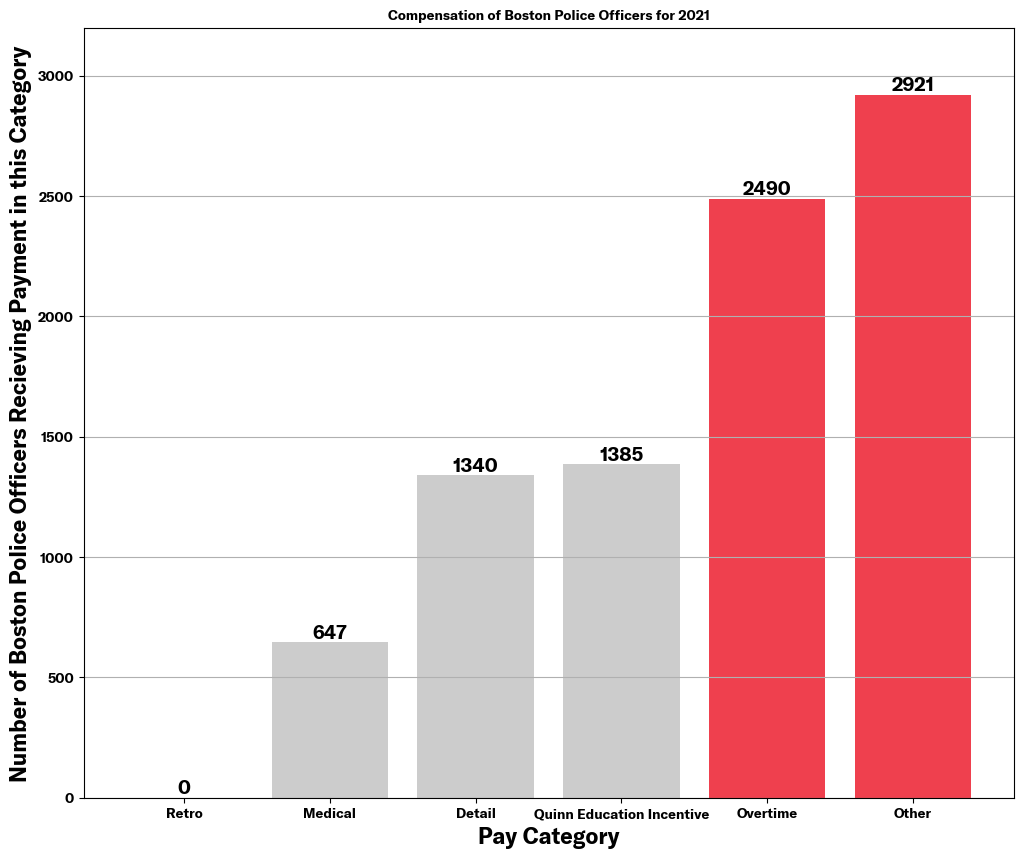

In [18]:

colors = ["#FCAA17", "#FCAA17", "#EF404E",'#552564','#0055AA',
    '#130F54','#3C3532','#691B40','#231F20','#EFECEA',
    '#FFE06A','#FFE06A','#FABEAF','#A3DBE3','#CCCCCC' ]
font = fpath


# make data
x = [ 'Retro','Medical', 'Detail','Quinn Education Incentive','Overtime', 'Other']
y = [len(retro_bpd),len(injured_bpd),len(detail_bpd),len(quinn_bpd),len(ot_bpd),len(other_bpd)]

# plot
fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(12)


colors = []
for y2 in y:
    if y2 > np.array(y).mean()+(np.array(y).mean()/2):
        colors.append('#EF404E')
    else:
        colors.append('#CCCCCC')

cont = ax.bar(x,y, color=colors)
ax.set(ylim=(0, 3200),yticks=range(0,3200,500))
plt.xlabel('Pay Category', fontsize=16, font=font)
plt.ylabel('Number of Boston Police Officers Recieving Payment in this Category', fontsize=16, font=font)
plt.title('Compensation of Boston Police Officers for 2021',fontsize=18, font=font)
plt.grid(axis='y')


ax.bar_label(container=cont, labels=y,fontsize=14,font=font)

plt.xticks(font=fpath)
plt.yticks(font=fpath)


plt.show()

	-Pie chart of Total BPD payroll broken down in Injury, Base / Regular, OT, Detail, Quinn, Other, Retro

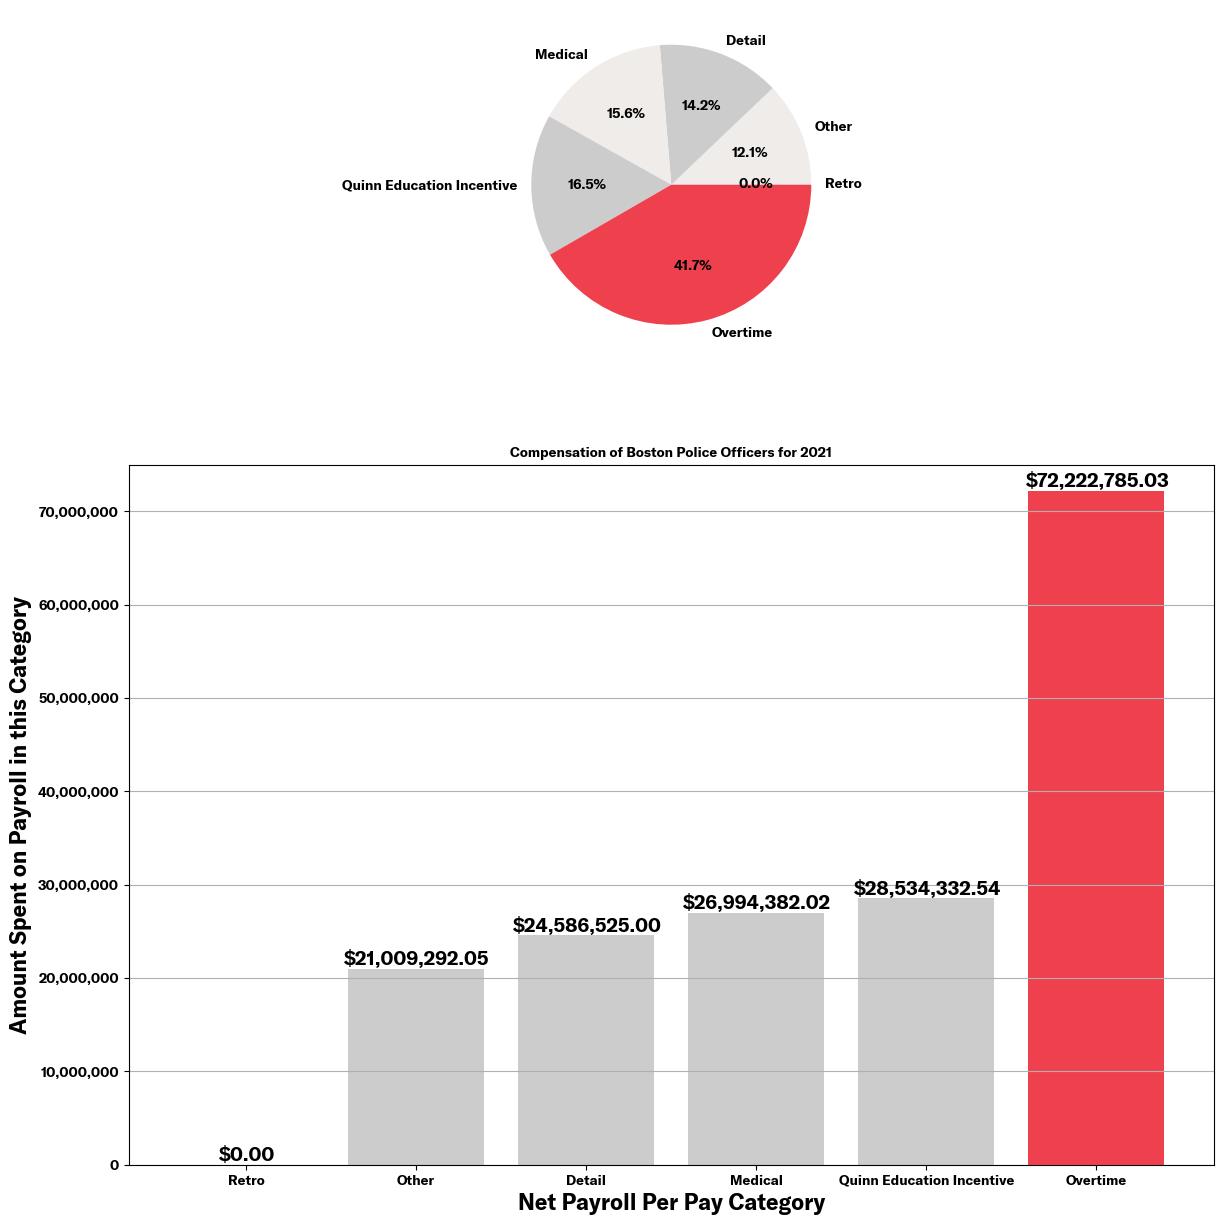

In [23]:

colors = ["#FCAA17", "#FCAA17", "#EF404E",'#552564','#0055AA',
    '#130F54','#3C3532','#691B40','#231F20','#EFECEA',
    '#FFE06A','#FFE06A','#FABEAF','#A3DBE3','#CCCCCC' ]
font = fpath


# make data
x = [ 'Retro', 'Other', 'Detail','Medical','Quinn Education Incentive','Overtime']
y = [retro_bpd.apply(lambda x:float(x.replace(",",""))).sum(),
     other_bpd.apply(lambda x:float(x.replace(",",""))).sum(),
     detail_bpd.apply(lambda x:float(x.replace(",",""))).sum(),
     injured_bpd.apply(lambda x:float(x.replace(",",""))).sum(),
     quinn_bpd.apply(lambda x:float(x.replace(",",""))).sum(),
     ot_bpd.apply(lambda x:float(x.replace(",",""))).sum()]
# plot
fig, (ax,ax2) = plt.subplots(2,1,figsize=(16,9), gridspec_kw={'height_ratios': [1, 2]})

fig.set_figheight(15)
fig.set_figwidth(14)



colors = []
for y2 in y:
    if y2 > np.array(y).mean()+(np.array(y).mean()/2):
        colors.append('#EF404E')
    else:
        colors.append('#CCCCCC')
cont = ax2.bar(x,y, color=colors)
ax2.set_ylim(0, 75000000)
ax2.set_yticks(range(0,75000000,10000000))

#ax2.set(ylim=(0, 75000000),yticks=range(0,75000000,10000000))
plt.ticklabel_format(style='plain', axis='y', useLocale=True)
plt.xlabel('Net Payroll Per Pay Category', fontsize=16, font=font)
plt.ylabel('Amount Spent on Payroll in this Category', fontsize=16, font=font)
plt.title('Compensation of Boston Police Officers for 2021',fontsize=18, font=font)
plt.grid(axis='y')

locale.setlocale(locale.LC_ALL, '')
labels = []
for i in y:
    labels.append(locale.currency(i, grouping=True))
    
ax2.bar_label(container=cont, labels=labels,fontsize=14,font=font)


plt.xticks(font=fpath)
plt.yticks(font=fpath)
colors = ['#CCCCCC','#EFECEA','#CCCCCC','#EFECEA','#CCCCCC','#EF404E']
ax.pie(y,labels=x, colors=colors,
       autopct=f'%.1f%%',textprops={'font':fpath})

plt.show()